In [1]:
# set work dir
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.reload_library()
plt.style.use("science")
from matplotlib import cm

In [3]:
# number of cores
#cores = [i for i in range(1,33)]
cores = [1, 2, 4, 8, 16, 32]

In [4]:
def plot(cores, elapsed_spo, elapsed_bb, title):
    # color map
    cmap = cm.get_cmap("Set2")
    colors = cmap(np.linspace(0, 1, 8))
    fig = plt.figure(figsize=(16,8))
    plt.plot(cores, elapsed_spo, marker="o", linestyle="--", markersize=10, lw=5, color=colors[2], label="SPO+")
    plt.plot(cores, elapsed_bb, marker="o", linestyle="--", markersize=10, lw=5, color=colors[4], label="DBB")
    plt.xlabel("Num of Cores", fontsize=36)
    plt.ylabel("Runtime per Epoch (Sec)", fontsize=36)
    plt.xticks(ticks=cores, fontsize=28)
    plt.yticks(fontsize=28)
    plt.legend(fontsize=32)
    plt.title(title, fontsize=36)
    plt.show()
    if title == "Shortest Path":
        prob = "sp"
    if title == "Knapsack":
        prob = "ks"
    if title == "Traveling Salesman":
        prob = "tsp"
    fig.savefig("./images/parallel-{}.pdf".format(prob), dpi=300)

## Shortest Path 

In [5]:
elapsed_spo = []
elapsed_bb = []
for c in cores:
    df = pd.read_csv("./res/sp/h5w5/gurobi/procs/n1000p5-d4-e0.5_spo_lr_adam0.001_bs32_l10.0l20.0_c{}.csv".format(c))
    elapsed_spo.append(df["Elapsed"].mean() / df["Epochs"].mean())
    df = pd.read_csv("./res/sp/h5w5/gurobi/procs/n1000p5-d4-e0.5_bb_lr_adam0.01_bs32_l10.0l20.0_c{}-lamb20.csv".format(c))
    elapsed_bb.append(df["Elapsed"].mean() / df["Epochs"].mean())

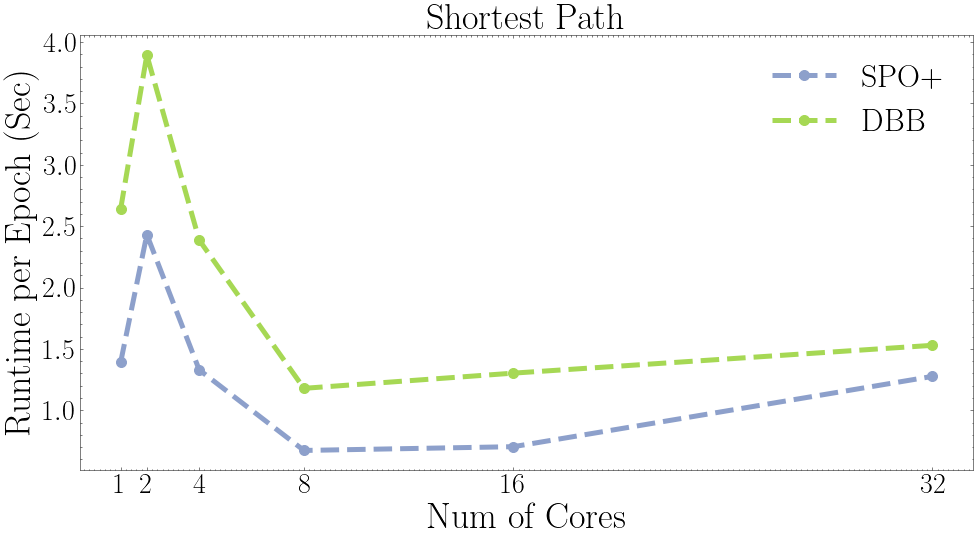

In [6]:
plot(cores, elapsed_spo, elapsed_bb, "Shortest Path")

## Kanpsack

In [7]:
elapsed_spo = []
elapsed_bb = []
for c in cores:
    df = pd.read_csv("./res/ks/i48d1c30/gurobi/procs/n1000p5-d4-e0.5_spo_lr_adam0.005_bs32_l10.0l20.0_c{}.csv".format(c))
    elapsed_spo.append(df["Elapsed"].mean() / df["Epochs"].mean())
    df = pd.read_csv("./res/ks/i48d1c30/gurobi/procs/n1000p5-d4-e0.5_bb_lr_adam0.001_bs32_l10.0l20.0_c{}-lamb20.csv".format(c))
    elapsed_bb.append(df["Elapsed"].mean() / df["Epochs"].mean())

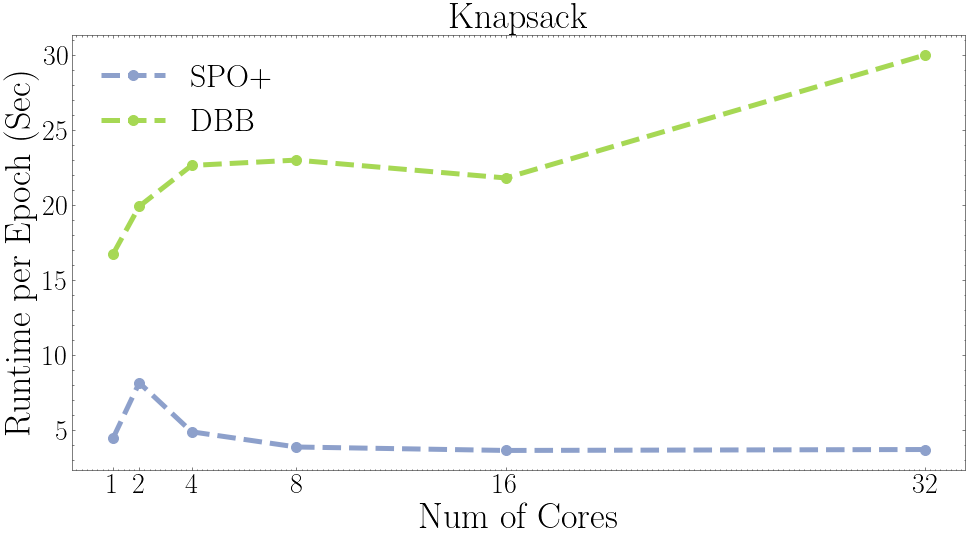

In [8]:
plot(cores, elapsed_spo, elapsed_bb, "Knapsack")

## 

## TSP

In [9]:
elapsed_spo = []
elapsed_bb = []
for c in cores:
    df = pd.read_csv("./res/tsp/n20/dfj/gurobi/procs/n1000p10-d4-e0.5_spo_lr_adam0.01_bs32_l10.0l20.0_c{}.csv".format(c))
    elapsed_spo.append(df["Elapsed"].mean() / df["Epochs"].mean())
    df = pd.read_csv("./res/tsp/n20/dfj/gurobi/procs/n1000p10-d4-e0.5_bb_lr_adam0.001_bs32_l10.0l20.0_c{}-lamb20.csv".format(c))
    elapsed_bb.append(df["Elapsed"].mean() / df["Epochs"].mean())

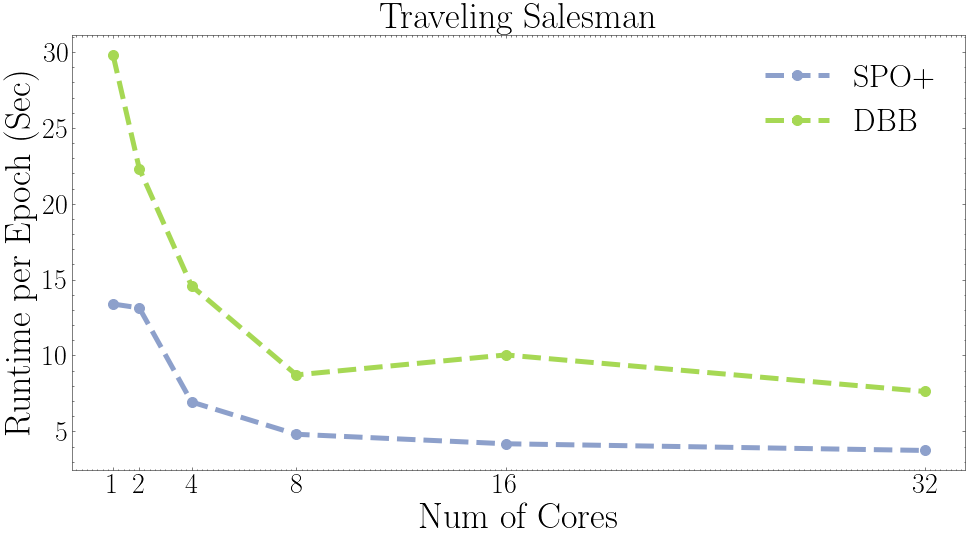

In [10]:
plot(cores, elapsed_spo, elapsed_bb, "Traveling Salesman")